Candidate Name: Raza Ali

Assignment for  Data Science / Data Engineering

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
sns.set_style("whitegrid")

In [4]:
df = pd.read_csv("/content/Skydata_pro.csv")
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237658e+18,122.472536,29.477546,18.80104,18.79409,19.17904,19.46893,19.62121,2830.0,301.0,1.0,82.0,5.011614e+18,STAR,0.000113,4451.0,55537.0,848.0
1,1.237661e+18,157.220491,38.044462,19.21634,17.36450,16.39222,15.96160,15.62490,3647.0,301.0,1.0,123.0,1.607801e+18,GALAXY,0.107083,1428.0,52998.0,56.0
2,1.237665e+18,128.426499,22.244187,17.58285,16.66683,16.37511,16.23573,16.03283,4517.0,301.0,2.0,113.0,2.171901e+18,GALAXY,0.024777,1929.0,53349.0,144.0
3,1.237655e+18,148.311910,3.603649,19.49339,18.02611,17.21924,16.73868,16.43414,2125.0,301.0,3.0,197.0,6.429279e+17,GALAXY,0.091564,571.0,52286.0,142.0
4,1.237649e+18,188.615906,0.966501,19.11787,18.80892,18.65386,18.43037,18.44886,752.0,301.0,6.0,301.0,3.266113e+17,QSO,1.528742,290.0,51941.0,365.0


## Checking null values

In [ ]:
print("Number of rows containing missings values: ",np.sum(np.sum(df.isna(), axis = 1).values > 0))

Number of rows containing missings values:  4193


Number of rows containing missings values:  4193


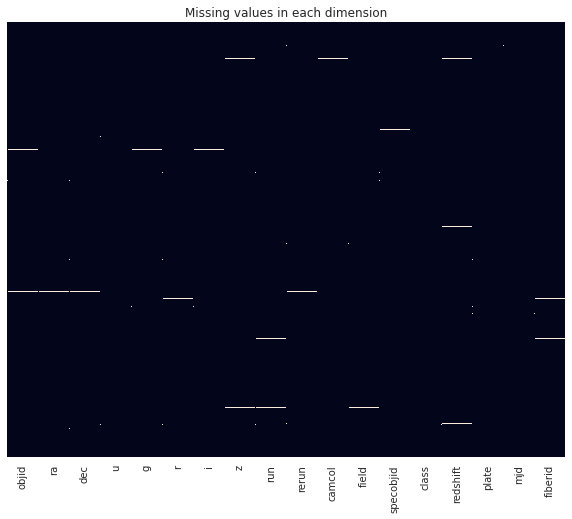

In [ ]:
# checking the distribution of missing values among features. If there is only one feature that contains most of the missing values, we can just drop that feature.

missing = df.isna()
fig, ax = plt.subplots(figsize = (10,8))
print("Number of rows containing missings values: ",np.sum(np.sum(df.isna(), axis = 1).values > 0))
plt.title("Missing values in each dimension")
#ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
_ = sns.heatmap(missing, cbar= False)

In [5]:
# Since the number of missing values is way less than the data available, we can just drop all rows that contain any missing instance

df.dropna(axis = 0, inplace = True)

## Exploring Data

In [ ]:
df.drop(df.columns[[0,13]], axis = 1)

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
0,122.472536,29.477546,18.80104,18.79409,19.17904,19.46893,19.62121,2830.0,301.0,1.0,82.0,5.011614e+18,0.000113,4451.0,55537.0,848.0
1,157.220491,38.044462,19.21634,17.36450,16.39222,15.96160,15.62490,3647.0,301.0,1.0,123.0,1.607801e+18,0.107083,1428.0,52998.0,56.0
2,128.426499,22.244187,17.58285,16.66683,16.37511,16.23573,16.03283,4517.0,301.0,2.0,113.0,2.171901e+18,0.024777,1929.0,53349.0,144.0
3,148.311910,3.603649,19.49339,18.02611,17.21924,16.73868,16.43414,2125.0,301.0,3.0,197.0,6.429279e+17,0.091564,571.0,52286.0,142.0
4,188.615906,0.966501,19.11787,18.80892,18.65386,18.43037,18.44886,752.0,301.0,6.0,301.0,3.266113e+17,1.528742,290.0,51941.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,53.104646,0.406206,19.56170,18.10295,17.53076,17.22465,17.07487,4849.0,301.0,4.0,809.0,4.673661e+17,0.022364,415.0,51810.0,428.0
104996,139.371132,21.871209,19.20145,17.67397,17.09594,16.88945,16.81790,5071.0,301.0,3.0,169.0,2.594136e+18,0.000077,2304.0,53762.0,227.0
104997,195.616433,50.155119,17.31194,16.21064,15.83690,15.70822,15.67614,2964.0,301.0,5.0,367.0,3.646903e+18,-0.000121,3239.0,54888.0,410.0
104998,185.585052,6.434501,18.73713,17.59770,17.01564,16.67914,16.42806,3841.0,301.0,1.0,138.0,1.830781e+18,0.074901,1626.0,53472.0,248.0


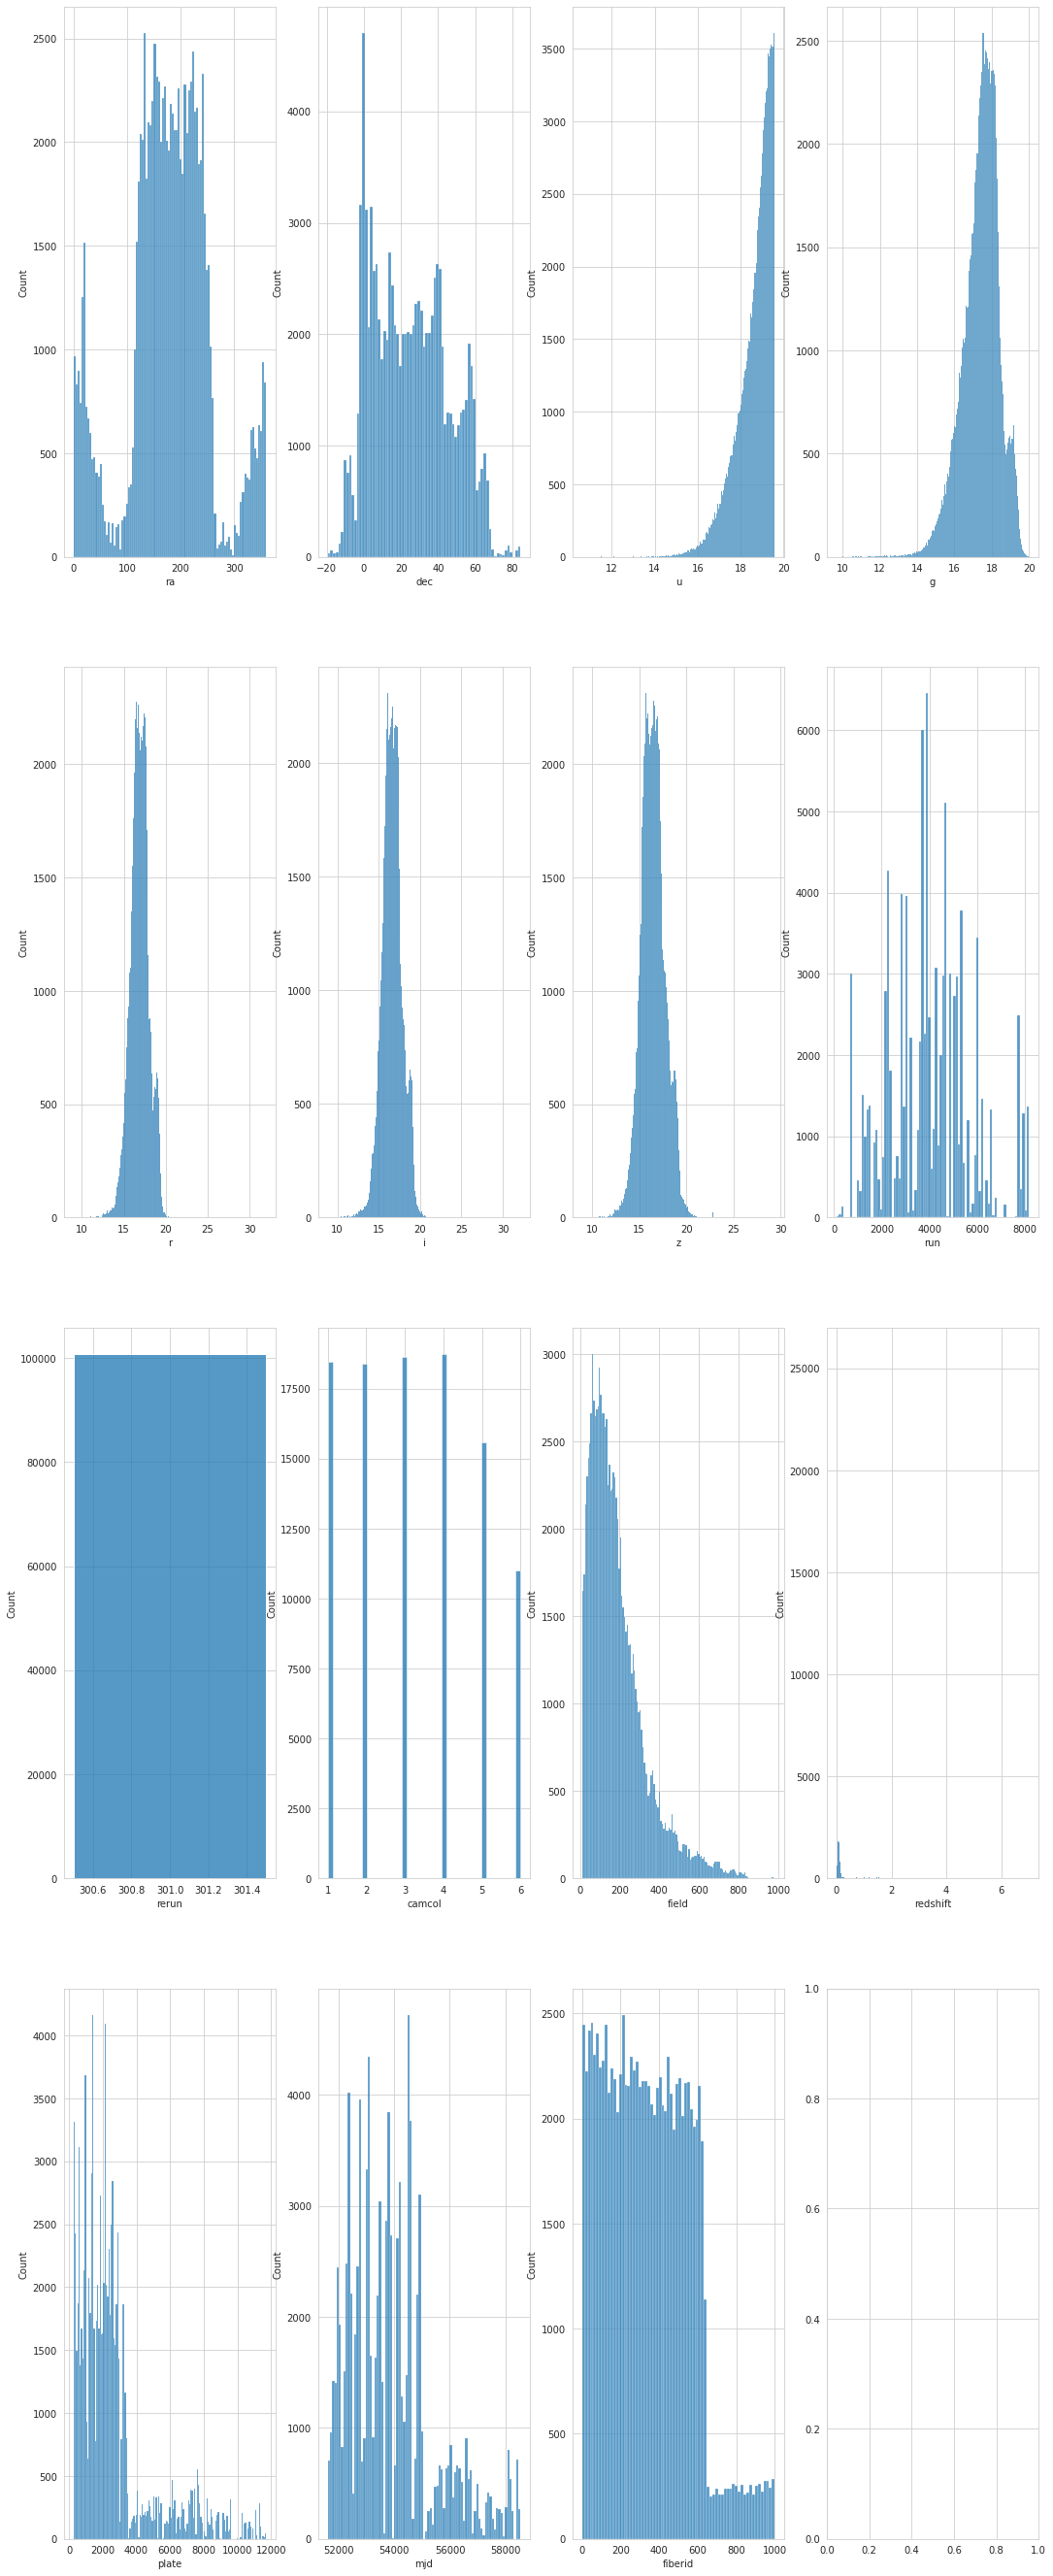

In [ ]:
# dropping ObjId, specobjid and Class feature to check distribution of each indivitual feature

skip = df.drop(df.columns[[0,12, 13]], axis = 1)
fig, ax = plt.subplots(4,4, figsize = (18,48))
ax = ax.reshape(-1)
for i in range(15):
    sns.histplot(skip.iloc[:,i],  ax = ax[i])

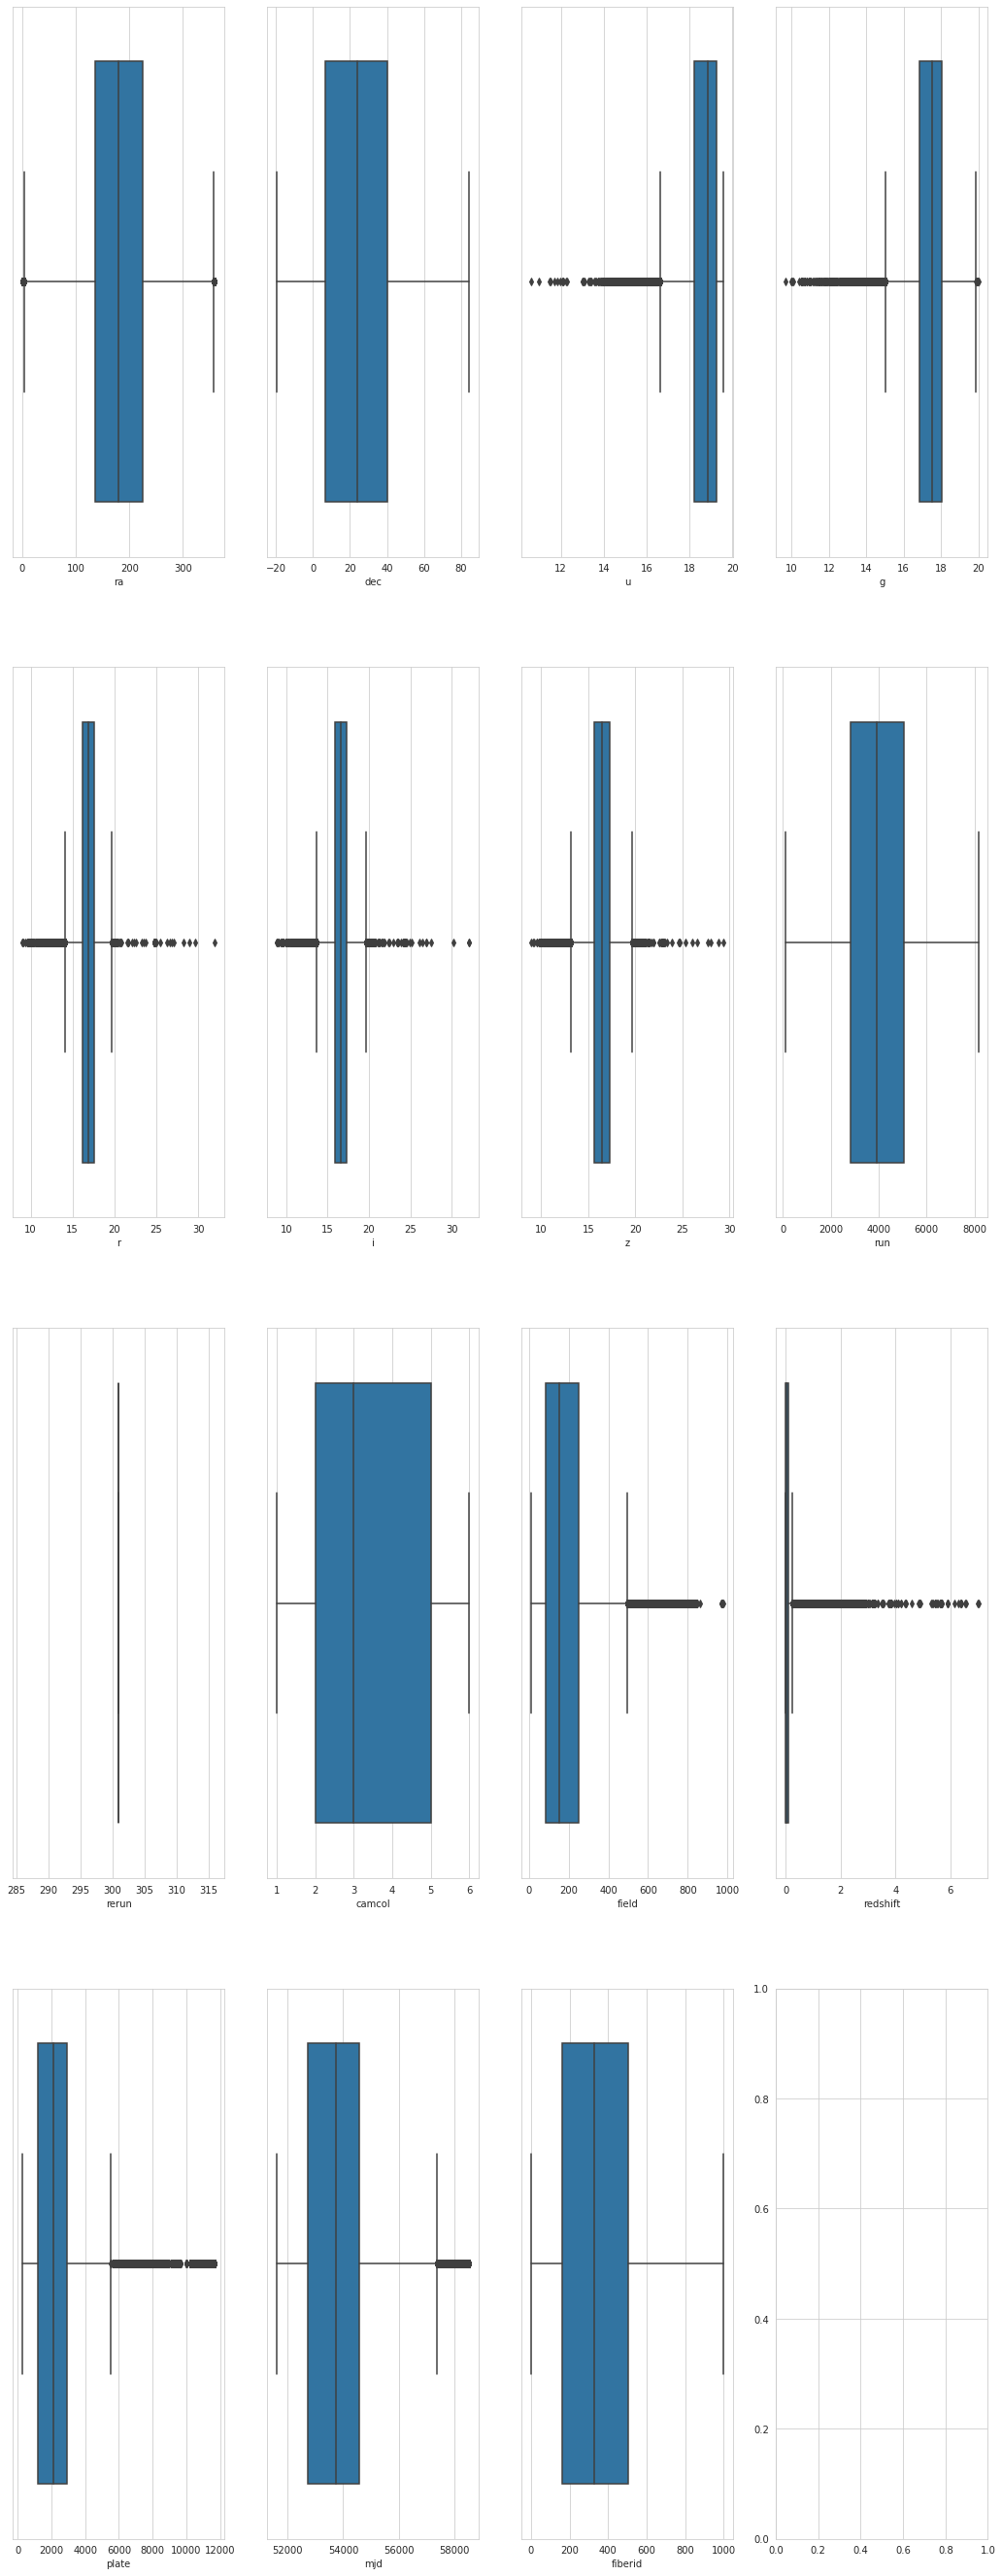

In [ ]:
# dropping ObjId, specobjid and Class feature to check distribution of each indivitual feature

skip = df.drop(df.columns[[0,12,13]], axis = 1)
fig, ax = plt.subplots(4,4, figsize = (18,48))
ax = ax.reshape(-1)
for i in range(15):
    sns.boxplot(x = skip.iloc[:,i],  ax = ax[i])

Text(0, 0.5, 'Class Value Count')

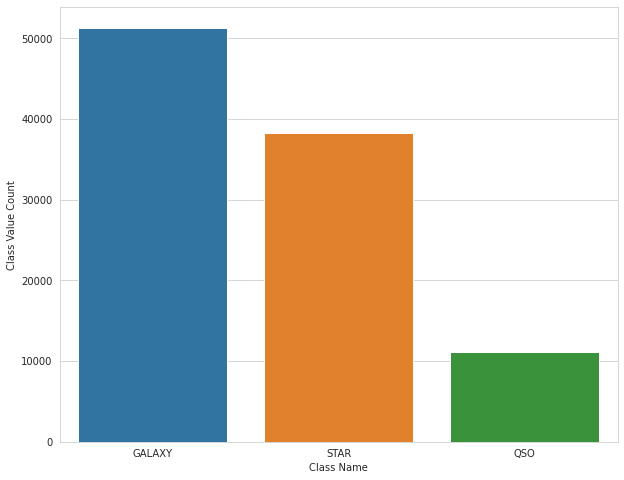

In [ ]:
# Checking class distributions

ii = df["class"].value_counts()
plt.figure(figsize = (10,8))
sns.barplot(x = ii.index, y = ii.values)
plt.xlabel("Class Name")
plt.ylabel("Class Value Count")

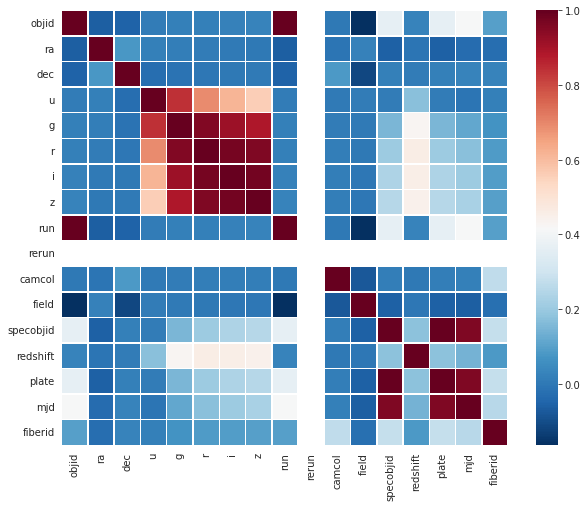

In [ ]:
# Checking correlations between features

plt.figure(figsize= (10,8))
sns.heatmap(df.corr(),  
            cmap='RdBu_r',
            linewidth=0.5)

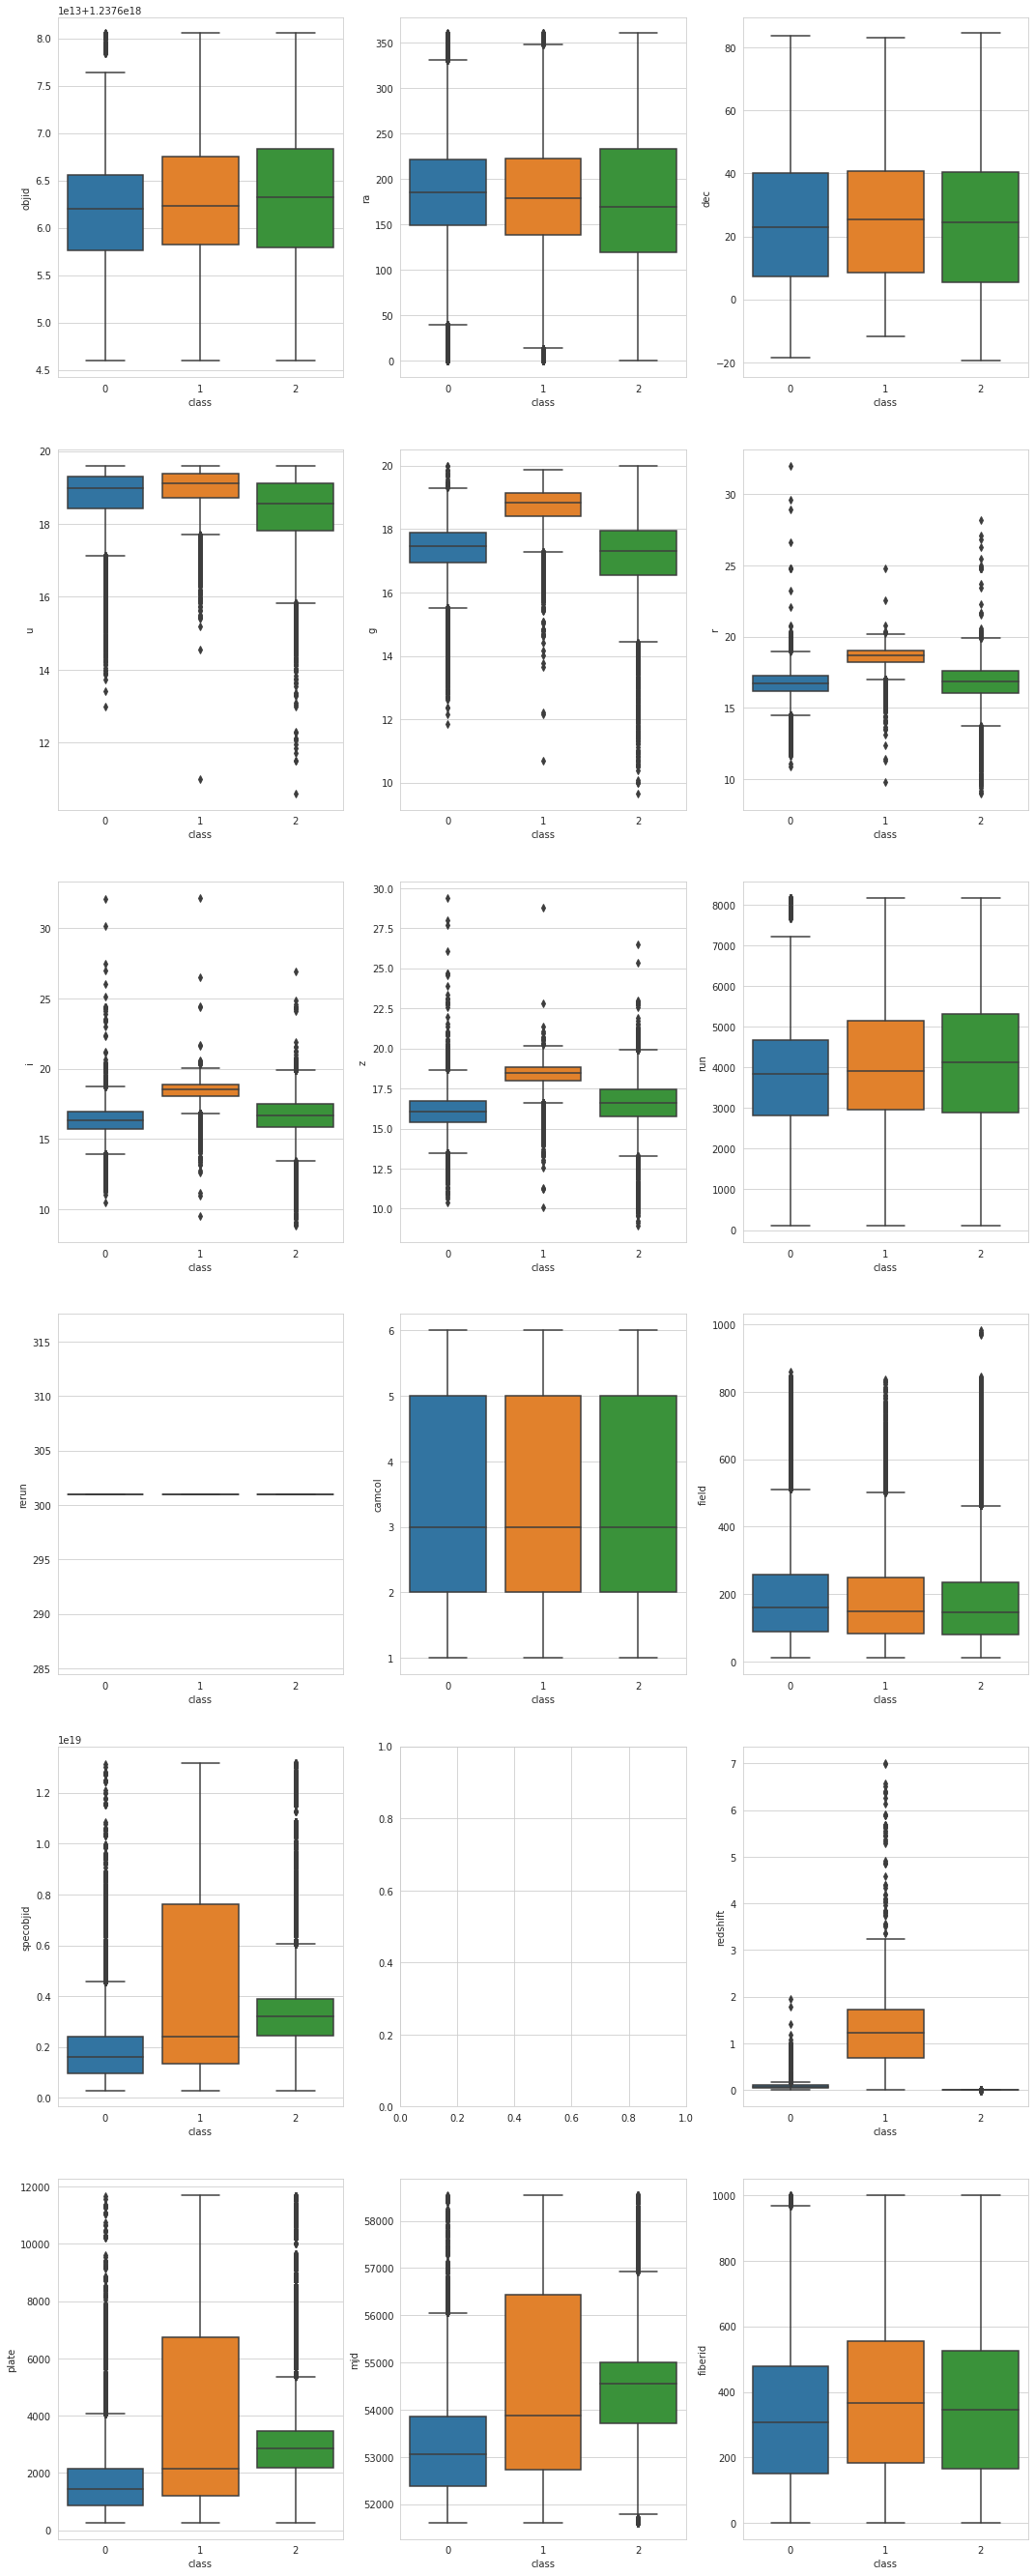

In [17]:
# Checking distribution of each feature with respect to each label. This would also help us in Naive Bayes Classifier

fig, ax = plt.subplots(6,3, figsize = (18,48))
ax = ax.reshape(-1)
for i, col in enumerate(df.columns):
  if col == 'class':
    continue
  sns.boxplot(x = 'class', y = col, data = df, ax = ax[i])

In [ ]:
# Checking Average values of each feature


# galaxy_avg = df[df['class'] == 'GALAXY']
# galaxy_avg = galaxy_avg.drop(columns = ['class'], axis = 1)
# galaxy_avg = np.mean(galaxy_avg, axis = 0).values


# star_avg = df[df['class'] == 'STAR']
# star_avg = star_avg.drop(columns = ['class'], axis = 1)
# star_avg = np.mean(star_avg, axis = 0).values

# qso_avg = df[df['class'] == 'QSO']
# qso_avg = qso_avg.drop(columns = ['class'], axis = 1)
# qso_avg = np.mean(qso_avg, axis = 0).values

array([1.23766180e+18, 1.82148200e+02, 2.48049376e+01, 1.87615326e+01,
       1.73059914e+01, 1.66135794e+01, 1.62452130e+01, 1.59955372e+01,
       3.80167580e+03, 3.01000000e+02, 3.25259630e+00, 1.94995168e+02,
       1.90626358e+18, 7.80921076e-02, 1.69302414e+03, 5.32407611e+04,
       3.19426242e+02])

## Modelling

In [6]:
## Converting the string labels to numeric form to insert in Machine Learning Model

le = preprocessing.LabelEncoder()
le.fit(df['class'])
df['class'] = le.transform(df['class'])

In [20]:
# Dropping the id and specobjid from the feature space cause they are just the identifiers.

x = df.drop(df.columns[[0,12,13]], axis = 1)
y = df.iloc[:,13]

In [21]:
# Train Test and Validation Splitting

xtr, xte, ytr, yte = train_test_split(x, y, test_size=0.33, random_state=42)
xtr_val, xte_val, ytr_val, yte_val = train_test_split(xtr, ytr, test_size=0.33, random_state=42)

#### Selection of Model:

* SVM: This ML method requires Inverting the feature Matrix which won't be feasible in this example due to very large number of instances.
* K-Nearest Neigbor: Calculating distance of each point with respect to every other point in the dataset makes this method also less feasible.
* Naive Bayes and Random Forests both do not require Scaling plus they are very fast algorithms hence they can be chosen easily.

In [ ]:
scaler = StandardScaler()
xtr_norm = scaler.fit_transform(xtr)
xte_norm = scaler.fit_transform(xte)

In [24]:
clf = GaussianNB()
clf.fit(xtr, ytr)
print("The test score using Gaussain Naive Bayes is",clf.score(xte, yte))

The test score using Gaussain Naive Bayes is 0.7736195028105931


Naive Bayes makes an assumption that all the variables are Normally distributed however in this situation, not all the features are Gaussian hence the model is a bit weak.

In [25]:
clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(xtr, ytr)
pred = clf.predict(xte)
print("The test score for Random Forest is ",clf.score(xte, yte))

The test score for Random Forest is  0.9715934710073045


Random Forest efficiently learn the model pattern. Since the test score is very high, it clearly indicates a low bias, low variance model which is always preffered

In [26]:
print(classification_report(yte, pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     16939
           1       0.93      0.85      0.89      3694
           2       0.99      1.00      0.99     12634

    accuracy                           0.97     33267
   macro avg       0.96      0.94      0.95     33267
weighted avg       0.97      0.97      0.97     33267



* It is very important to analyze the metrics: Precision and Recall because sometime one class maybe unbalanced which would end up model just learning to reproduce output for that class.
* Here we can see very high F1 score for all 3 classes which is an evidence that our model generalized very well

## HyperParameter Tuning of max_depth

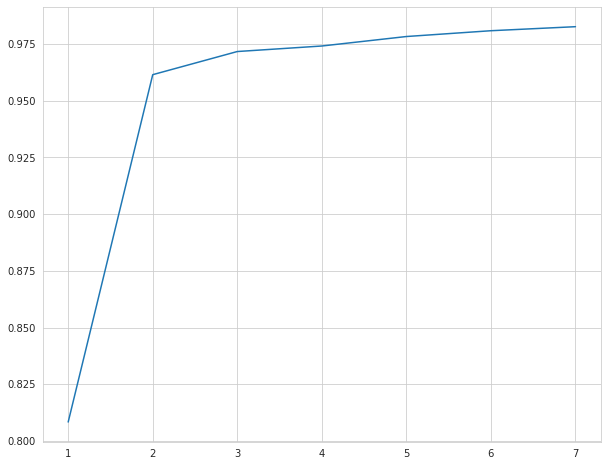

In [16]:
depth = [1,2,3,4,5,6,7]
avg_f1 = []
for d in depth:
  clf = RandomForestClassifier(max_depth=d, random_state=0)
  clf.fit(xtr_val, ytr_val)
  pred = clf.predict(xte_val)
  acc = f1_score(yte_val, pred, average='weighted')
  avg_f1.append(acc)

plt.figure(figsize = (10,8))
plt.plot(depth, avg_f1)
plt.xlabel("Depth of Random Forest")
plt.ylabel("Weighted F1 score")

From the figure above, it can be statde that max_depth = 5 is a good choice.

## Saving the model

In [27]:
import pickle
clf = RandomForestClassifier(max_depth=5, random_state=0)
clf.fit(x, y)
pickle.dump(clf, open('model.sav', 'wb'))